In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(b + w x) 
\end{equation}
\begin{equation}
\hat{y} = \sigma(b + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## Understanding cost function

### y가 1인경우
- -log(H(x)) <br>
H(x) = 1, cost(1) = 0 <br>
H(x) = 0, cost(0) = 무한대 <br>

### y가 0인경우
- -log(1-H(x)) <br>
H(x) = 0, cost(0) = 0 <br>
H(x) = 1, cost(1) = 무한대 <br> 

#### C(H(x),y) = -y*log(H(x)) - (1-y)*log(1-H(x))
- y * -np.log(hy) +(1-y) * np.log(1-hy)

In [4]:
x = np.array( [1., 2., 3., 4., 5., 6.] )
y = np.array( [ 0.,  0.,  0., 1., 1., 1.] )

In [5]:
w = 0 # weight
b = 0 # bias
n = len(x)
epochs = 500
learning_reate = 0.01

In [6]:
# 시그모이드함수
def sigmoid(z):
    return 1/ (1+math.e ** -z)

In [7]:
# cost 함수 (sigmoid 함수 통과)
def cost(x,y,w):
    n = len(x)
    z = w*x
    hy = sigmoid(z) # 활성함수
    loss_i = y * -np.log(hy) +(1-y) * np.log(1-hy) # cost값 그래프를 펴주는 작업
    loss = np.sum(loss_i)/n # sigmoid만 통과하면 그대로 사용할수 없음, 매끄럽게 만드는 작업 필요
    return loss

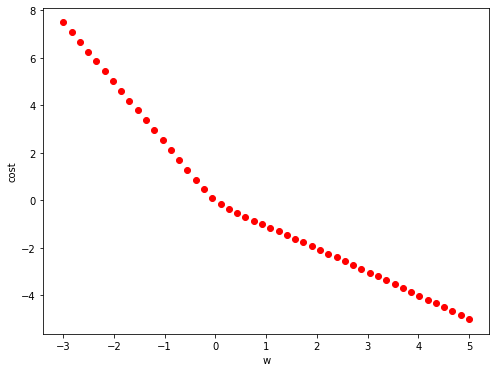

In [8]:
plt.figure(figsize=(8,6))
plt.xlabel('w')
plt.ylabel('cost')

for w in np.linspace(-3,5,50):
    c  = cost(x, y,w)
    plt.plot(w,c,'ro')
plt.show()

## 로지스틱 라이브러리 사용

In [2]:
# [공부한시간, 출석일수]
x_data = np.array( [[1,3],[2,2],[3,1],[4,6],[5,5],[6,4]])
y_data = np.array( [0,0,0,1,1,1])


In [3]:
model_logi = LogisticRegression()
model_logi.fit(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
# 기울기
model_logi.coef_

array([[0.78341156, 0.78341156]])

In [5]:
# b
model_logi.intercept_

array([-5.48382067])

In [6]:
# 시그모이드함수
def sigmoid(z):
    return 1/ (1+math.e ** -z)

In [8]:
# 1x2 * 2x1 + 1x1 
z=np.matmul([[6,6]], model_logi.coef_.T )+ model_logi.intercept_
z

array([[3.9171181]])

In [9]:
# 값만 넘기게 하기위함
sigmoid(float(z))

0.9804898623547998

In [10]:
# _proba : 시그모이드를 통과했을때 값
# [[0일확률, 1일확률]]
model_logi.predict_proba([[6,6]])

array([[0.01951014, 0.98048986]])

In [10]:
print(model_logi.predict_proba([[6,6]]).argmax(axis=1))
model_logi.predict([[6,6]])

[1]


array([1])

In [13]:
model_logi.predict([[1,1],[3,1],[6,6]])

array([0, 0, 1])

## 분류에서는 단순히 정확도를 가지고 판단하지 않는다.
- f1.score, ... 로 확인

In [12]:
## accuracy (정확도) 참고
model_logi.score(x_data, y_data)

1.0

In [17]:
# 6행 1열 데이터
p = model_logi.predict(x_data)
print(p)
print(y_data)

[0 0 0 1 1 1]
[0 0 0 1 1 1]


## logistic 파라미터

penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

  l1: 맨하튼 거리, 오차 = 오차 + alpha * (|w1| + |w2|) <br>
  l2: 유클리디안 거리의 제곱, 오차 = 오차 + alpha * (W1^2 + w2^2)
  가중치 규제 (특성 수 줄이기, 과대적합 방지) <br>
  none 면 가중치 규제 미사용 <br>

  loss = loss + regularization strength X 가중치의 l1 혹은 l2 거리 (가중치 규제(과적합 방지))<br>
  가중치가 커지지 못하게 하기 (과적합 방지)<br>

C : float, optional (default=1.0)<br>
  alpha 의 역수<br>
  alpha 는 클수록 가중치 규제, 작을수록 정확하게 (과적합)<br>

  regularization strength(가중치 규제 항목에 곱해지는 값)의 역수 (과적합 방지)
  디폴트 1.0
  역수기 때문에 작을수록 과적합 방지

#### penalty:L1 혹은 L2 제약조건의 강도를 설정  

#### alpha: 높은 알파 값을 설정할 수록, 높은 제약조건을 설정하는 것

#### C: 
cost function의 C를 의미하는 것이며,
C의 경우에는 높은 C를 설정할 수록, 낮은 강도의 제약조건이 설정되고
낮은 C를 설정할 수록, 높은 강도의 제약조건이 설정

### solver : 
liblinear:L1제약조건, L2제약조건 두 가지를 모두 지원하며, 이것은 작은 데이터에 적합한 알고리즘. <br>
sag, saga: 이것을 확률적경사하강법을 기반으로 하기에 대용량 데이터에 적합한 알고이름이라고 하며, <br>
sag는 L1 제약조건만을 지원하고, saga는 L1, L2 제약조건 둘 다 지원함.

<div style="color:red">회귀알고리즘에서 ridge와 lasso와 계수를 다루는 방법이 유사하다고 보면 된다.
L1규제는 lasso처럼 계수를 0으로도 만들 수 있고,
L2규제는 ridge처럼 계수를 0으로 만들진 않지만 영향력이 작으면 0에 가까운 값을 만들어 회귀식을 구성하게 된다.
</div>

#### newton-cg, lbfgs (sag, saga)  이것은 멀티클래스의 분류 모델에 쓰는 것

현재까지는 이 중에서 lbfgs 알고리즘이 가장 성능이 좋다고 알려져 있고, newton-cg, lbfgs 도 L2제약조건만 지원함.<br>
결국 sag는 L1만 지원하고, newton-cg, saga, lbfgs 세 가지가 L2만 지원하고, <br>
liblinear, saga가 L1, L2 둘 다 지원<br>

#### penalty :  L1, L2 제약조건을 설정하는 하이퍼 파라미터이고, default는 L2
    
#### class_weight :데이터에 직접 가중치를 설정하여 학습의 강도를 다르게 할 수 있는 하이퍼 파라미터. 